<a target="_blank" href="https://colab.research.google.com/github/swghosh/UG-Courses/blob/master/CSE3810/Function_Approximation_using_GRNN.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /><br>Run in Google Colab</a>

# Function Approximation using GRNN
A function approximation problem is a problem where we select a function that closely matches (approximates) a target function on the basis of given input data points.

In this notebook, we explore how to use a multi-layer GRNN (general regression neural network trained using back-propagation algorithm) to approximate a sample mathematical function (polynomial).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

Set random seed for deterministic results.

In [2]:
np.random.seed(28)

The sample polynomial function that we use for our experiment is:

$
f(x) = (x-1.0) (x-2.1) (x-4.7) (x-7.8) (x-8.9)
$

Therefore, equation $ f(x) = 0 $ has roots at $ x = 1.0, x = 2.1, x = 4.7, x = 7.8, x = 8.9 $.

We use $ x \in [0, 10] $ and compute $ f(x) $ in the same range.

In [3]:
x = np.linspace(0, 10, 500)

def f(x):
    a = 1.0 
    b = 2.1
    c = 4.7
    d = 7.8
    e = 8.9
    return (x - a) * (x - b) * (x - c) * (x - d) * (x - e)

y = f(x)

Use a white-grid style for better plots.

In [4]:
sns.set()
sns.set_style('whitegrid')

Plot the function `y` = $ f(x) $.

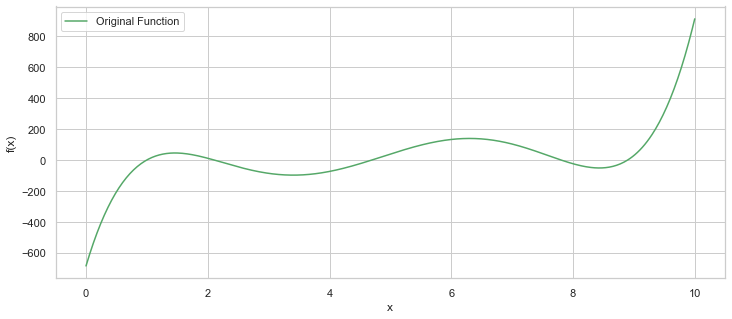

In [5]:
def plot_fn():
    plt.plot(x, y, 'g-')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
plt.figure(figsize=(12, 5))
plot_fn()
plt.legend(['Original Function'])
plt.show()

The mean and standard deviation of the values in `y` is calculated.

In [6]:
mean, stdev = np.mean(y), np.std(y)

Generate data points for `x` in the range $ x \in [0, 4] $ and $ x \in [5.5, 9.5] $. Data points sampled in this region from the above mathematical function will be used to train the model.

In [7]:
X1 = np.linspace(0, 4, 100)
X2 = np.linspace(5.5, 9.5, 100)

Generate random data points using a random normal distribution with `mean` and `stdev` (of `y`) calculated before. The random data points are used to jitter the actual function (add some noise) and generate regression values that will be used to train the neural network.

In [8]:
X_train = np.concatenate([X1, X2])
rand = np.random.normal(mean, stdev / 6, size=X_train.shape)
y_train = f(X_train) + rand

Plot the original function and the sampled data points.

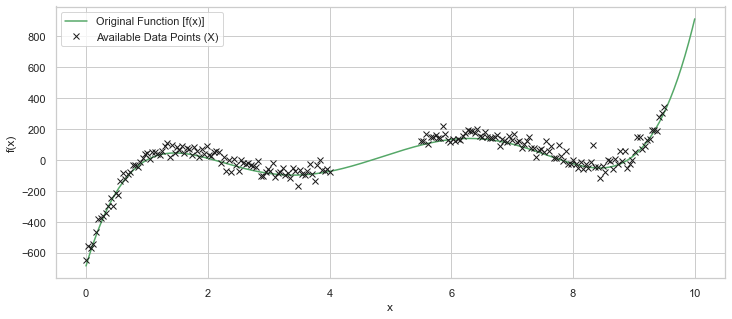

In [9]:
def plot_fn_and_data():
    plot_fn()
    plt.plot(X_train, y_train, 'kx')
    plt.legend(['Original Function [f(x)]', 'Available Data Points (X)'])

plt.figure(figsize=(12, 5))
plot_fn_and_data()
plt.show()

Construct a neural network with:
- 1 node in input layer (input: $ x $)
- 128 nodes in first hidden layer (activation used is ReLU)
- 256 nodes in second hidden layer (activation used is ReLU)
- 512 nodes in third hidden layer (activation used is ReLU)
- 1024 nodes in fourth hidden layer (activation used is ReLU)
- 1 node in output layer (output: $ y $)

PS: `max_iter` has been experimentally set to 1000, default value is 200, which raises convergence warning for this problem. It was found experimentally that this network architecture would learn slightly better than architectures with less number of hidden layers.

Essentially, this is a regression problem which we want the neural network to learn in order to approximate $ f(x) $ using input $ x $ only.

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(128, 256, 512, 1024), 
                   max_iter=1000)
X_train = X_train.reshape([-1, 1])
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128, 256, 512, 1024), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

The real valued predictions made by regression neural net.

In [11]:
x = x.reshape([-1, 1])
y_predict = mlp.predict(x)

Plot the original function, data points (used during training) and function approximation (function that the neural network learned).

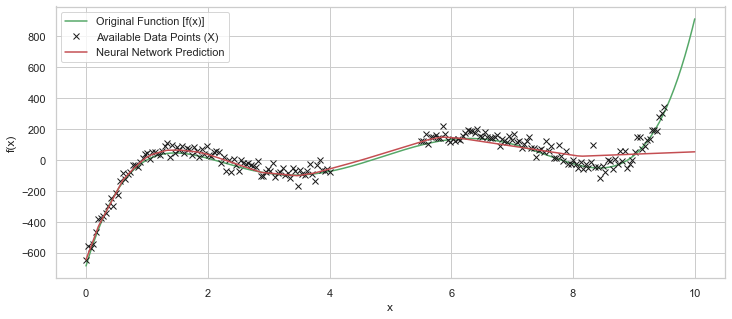

In [12]:
plt.figure(figsize=(12, 5))
plot_fn_and_data()
plt.plot(x, y_predict, 'r-')
plt.legend(['Original Function [f(x)]', 'Available Data Points (X)', 'Neural Network Prediction'])
plt.show()